In [2]:
pwd

'C:\\Users\\User\\OneDrive - Engenuity (Pvt) Ltd\\Github\\SPE-testing'

In [9]:
import os
from Utils.read_coord import kml_coord
from Utils.sentinal_request import senti_api
from Utils.forest_cover import get_cover, green_cover_plot
from Utils.seques_forecast import plot_SEQ
from Utils.map_view import map_show
from Utils.tree_count import count_trees
from Utils.tree_count import tree_count

import numpy as np
import pandas as pd


def count_trees(res,green_pixel,spacing):
    
    # Count no of trees per pixel
    tree_per_pixel = (res*res)/(spacing*spacing)
    tree_count = round(green_pixel*tree_per_pixel)
    
    print('Estimated No of Trees: ',tree_count)
    return tree_count

In [8]:
spacing = 4
count_trees(resol,green_pix,spacing)

Estimated No of Trees:  14200


14200

## Check a pipeline

Enter kml file path: C:\Users\DELL\Documents\GitHub\SPE\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
C:\Users\DELL\Documents\GitHub\SPE\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
The file exists
Forecasting for one tree type
Enter the tree type: Rubber
Enter the tree count: 900
resolution 10
green_pix 2522
green_cover 0.2522
forest_cover 89.02
Rubber
Do you know the spacing between the trees? (yes/no): h
Type yes or no
Do you know the spacing between the trees? (yes/no): no
user typed no
Estimated Number of Trees in your land: 2024


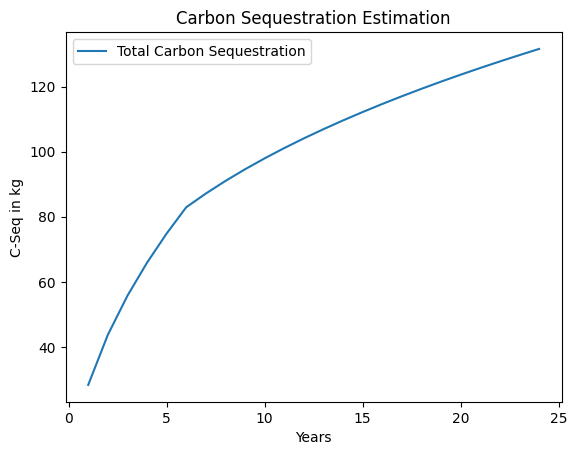

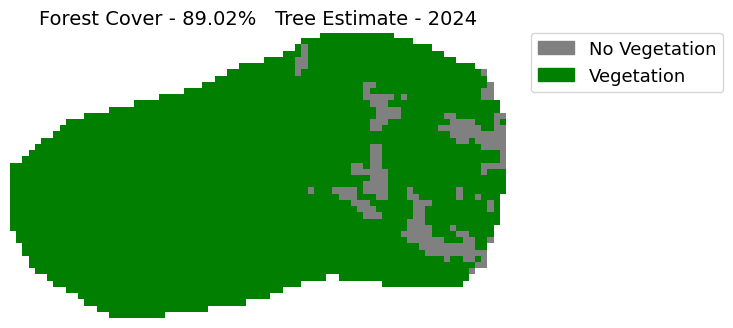

In [18]:
file_path = input('Enter kml file path: ')
print(file_path)
#C:\Users\DELL\Documents\GitHub\SPE\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
if os.path.exists(file_path):
    print('The file exists')

    with open(file_path, 'r', encoding='utf-8-sig') as f:
        lines = f.readlines()

        #print(lines)
else:
    print('The specified file does NOT exist')
    
# getting polygon coordinates
poly_coord = kml_coord(file_path)
#print(poly_coord)

# show the map view
map_show(poly_coord)

    
# User inputs
print("Forecasting for one tree type")
tree_type = input('Enter the tree type: ')
n_tree = input('Enter the tree count: ')
n_tree = int(n_tree)



img,resol = senti_api(poly_coord)
print('resolution',resol)
#print(img.shape)
#print(img[:,:,2][40][10])
forest_area,forest_cover,green_pix,green_cov,ndvi = get_cover(img,resol)
print('green_pix',green_pix)
print('green_cover',green_cov)
print('forest_cover',forest_cover)

# CO2 forecasting
print(tree_type)
plot_SEQ(tree_type,n_tree)

### new code for tree count in main.py
while True:
    user_input = input('Do you know the spacing between the trees? (yes/no): ')
    if user_input.lower() == 'yes':
        print('user typed yes')
        spacing = input('Enter the spacing between the trees in meters: ')
        spacing = int(spacing)
        t_count = count_trees(resol,green_pix,spacing)
        print("Estimated Number of Trees in your land:",t_count)
        break

    elif user_input.lower() == 'no':
        print('user typed no')
        t_count = tree_count(tree_type, green_cov)
        print("Estimated Number of Trees in your land:",t_count)
        break
    else:
        print('Type yes or no')

"""
spacing = input('Enter the spacing between the trees in meters: ')
spacing = int(spacing)


if spacing == 0:
    age_tree = input('Enter the average age of trees: ')
    age_tree = int(age_tree)

    t_count = tree_count(tree_type, green_cov, age_tree)
else:
    t_count = count_trees(resol,green_pix,spacing)
    
print("Estimated Number of Trees",t_count)
"""

fig = green_cover_plot(ndvi,forest_cover,t_count)